In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

Parametri

In [ ]:
IMG_SIZE = (100, 100)
BATCH_SIZE = 64
EPOCHS = 15

Pretprocesiranje i split

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    directory='.',  # ovdje je folder sa podfolderima Cat/ i Dog/
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    directory='.',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

print("Klase:", train_generator.class_indices)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Klase: {'Cat': 0, 'Dog': 1}


CNN model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Treniranje modela

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 79/313 ━━━━━━━━━━━━━━━━━━━━ 1:36 413ms/step - accuracy: 0.5236 - loss: 0.7890

c:\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 475ms/step - accuracy: 0.5879 - loss: 0.6908 - val_accuracy: 0.7297 - val_loss: 0.5431
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - accuracy: 0.7452 - loss: 0.5201 - val_accuracy: 0.7583 - val_loss: 0.4889
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 451ms/step - accuracy: 0.7790 - loss: 0.4654 - val_accuracy: 0.7721 - val_loss: 0.4789
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 484ms/step - accuracy: 0.8176 - loss: 0.4047 - val_accuracy: 0.7881 - val_loss: 0.4657
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 171s 547ms/step - accuracy: 0.8522 - loss: 0.3462 - val_accuracy: 0.7875 - val_loss: 0.4516
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 170s 543ms/step - accuracy: 0.8637 - loss: 0.3164 - val_accuracy: 0.7967 - val_loss: 0.4498
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 171s 545ms/step - accuracy: 0.8825 - loss: 0.2747 - val_accuracy: 0.8039 - val_loss: 0.4523
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 170s 543ms/step - accuracy: 0.9022 - loss: 0.23

Iscrtavanje loss i accuracy

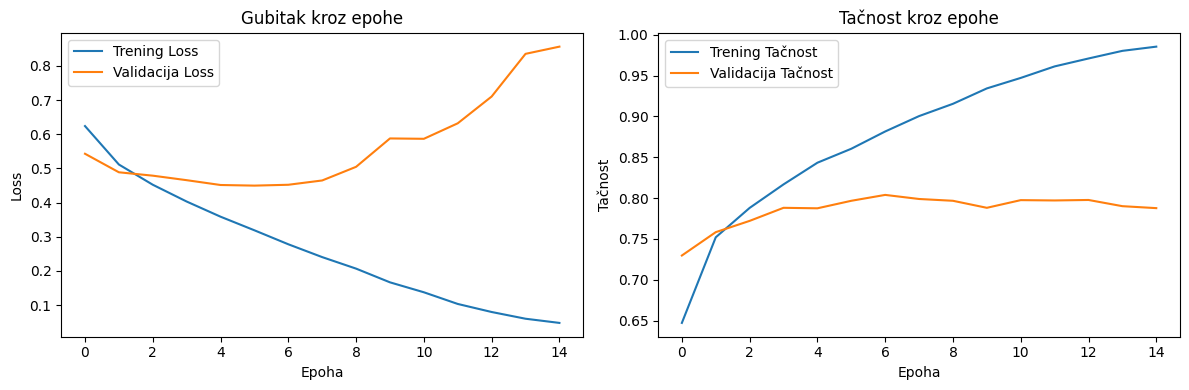

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trening Loss')
plt.plot(history.history['val_loss'], label='Validacija Loss')
plt.title('Gubitak kroz epohe')
plt.xlabel('Epoha')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Trening Tačnost')
plt.plot(history.history['val_accuracy'], label='Validacija Tačnost')
plt.title('Tačnost kroz epohe')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.legend()
plt.tight_layout()
plt.show()

Spremanje modela

In [ ]:
model.save('cat_dog_classifier_model.h5')
print("Model spašen kao 'cat_dog_classifier_model.h5'")

Model spašen kao 'cat_dog_classifier_model.h5'


Evaluacija: preciznost, recall, F1
Prikupljanje predikcija

In [ ]:
validation_generator.reset()
y_true = validation_generator.classes
y_pred_probs = model.predict(validation_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step

Classification Report:
              precision    recall  f1-score   support

         Cat       0.81      0.76      0.78      2499
         Dog       0.77      0.82      0.79      2499

    accuracy                           0.79      4998
   macro avg       0.79      0.79      0.79      4998
weighted avg       0.79      0.79      0.79      4998



Confusion matrix

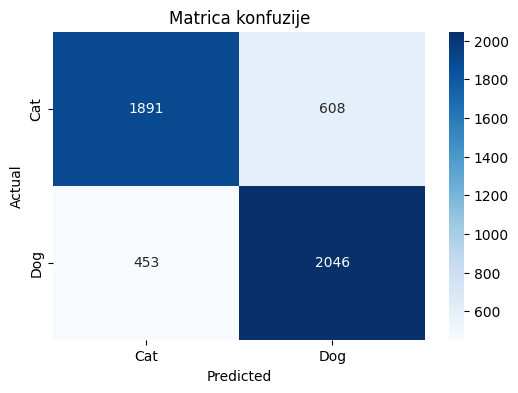

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrica konfuzije')
plt.show()

Prikaz i predikcija jedne slike iz test skupa za svaku klasu
Uzimamo sve validacione slike i njihove labele

In [ ]:
x_val, y_val = next(validation_generator)
for i in range(len(validation_generator)):
    batch_x, batch_y = next(validation_generator)
    x_val = np.concatenate((x_val, batch_x), axis=0)
    y_val = np.concatenate((y_val, batch_y), axis=0)

Funkcija za prikaz slike i predikcije

In [ ]:
def predict_and_show(image, true_label):
    pred_prob = model.predict(np.expand_dims(image, axis=0))[0][0]
    predicted_label = 'Dog' if pred_prob > 0.5 else 'Cat'
    true_label_str = 'Dog' if true_label == 1 else 'Cat'

    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Stvarna klasa: {true_label_str}\nPredikcija: {predicted_label} ({pred_prob:.2f})')
    plt.show()

Prikaz jedne mačke i jednog psa

Prikaz slike mačke:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


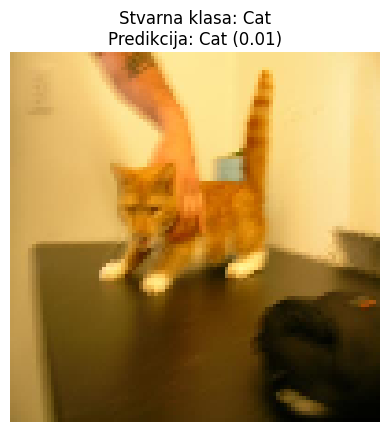

In [ ]:
for i in range(len(y_val)):
    if y_val[i] == 0:  # Cat
        print("Prikaz slike mačke:")
        predict_and_show(x_val[i], y_val[i])
        break

Prikaz slike psa:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


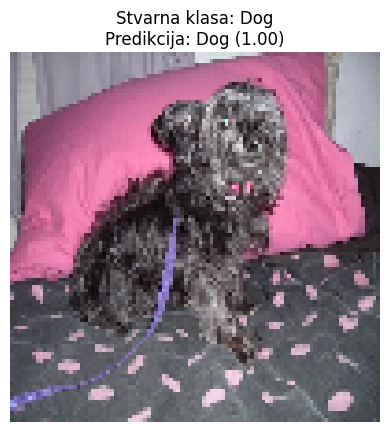

In [ ]:
for i in range(len(y_val)):
    if y_val[i] == 1:  # Dog
        print("Prikaz slike psa:")
        predict_and_show(x_val[i], y_val[i])
        break

Funkcija za predikciju po nazivu file-a

In [ ]:
def predict_from_filename(model, img_path, target_size=(100, 100), class_names=['Cat', 'Dog']):
    # Učitavanje i priprema slike
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predikcija
    pred = model.predict(img_array, verbose=0)[0][0]
    pred_label = class_names[1] if pred > 0.5 else class_names[0]

    # Prikaz slike
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predikcija: {pred_label} ({pred:.2f})')
    plt.show()

    return pred_label, float(pred)

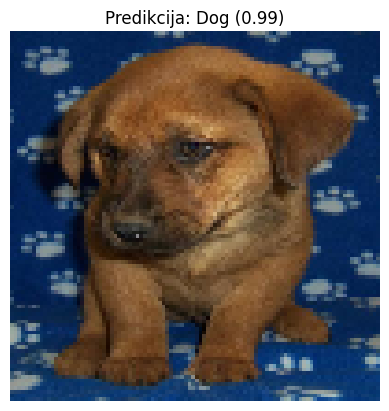

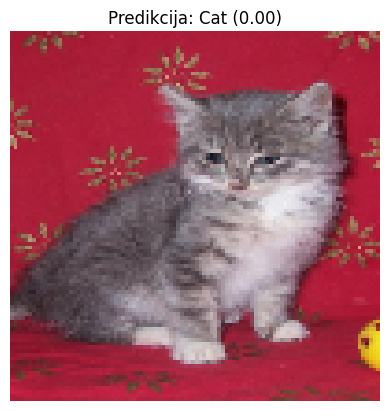

('Cat', 1.4881179595249705e-05)

In [ ]:
predict_from_filename(model, './Dog/245.jpg')
predict_from_filename(model, './Cat/110.jpg')

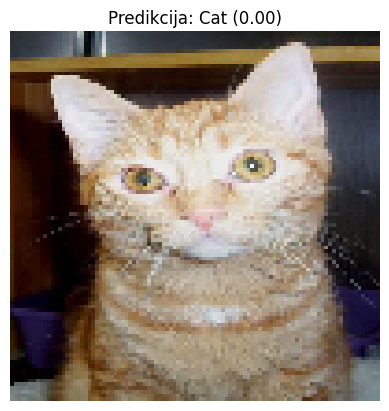

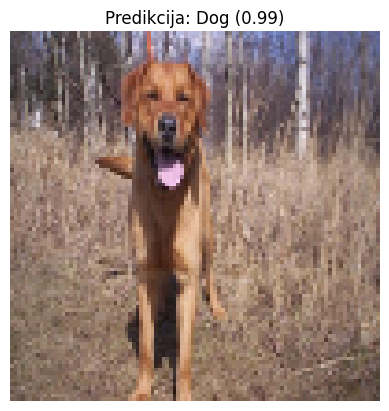

('Dog', 0.9865385293960571)

In [ ]:
predict_from_filename(model, './Cat/1137.jpg')
predict_from_filename(model, './Dog/1108.jpg')